#Exploring Wealth Inequality Using Adult Incomes Dataset

##Import Libraries

In [ ]:
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization

##Download Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

##Exploratory Data Analysis

General Distribution of Incomes

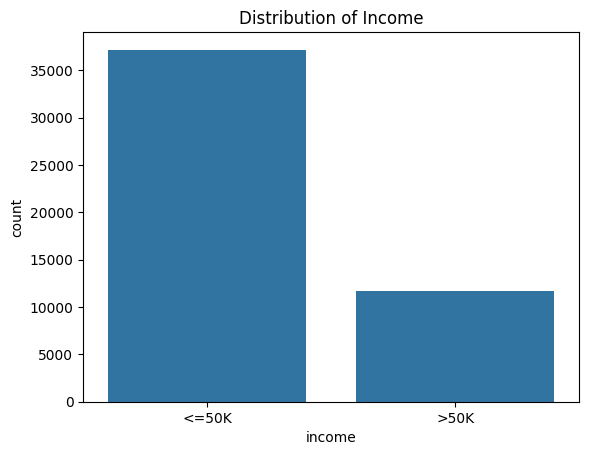

In [ ]:
y_cleaned = y.iloc[:, 0].str.strip().str.replace(r"\.$", "", regex=True)
sns.countplot(x=y_cleaned)
plt.title("Distribution of Income")
plt.show()

Income Distributions By Gender

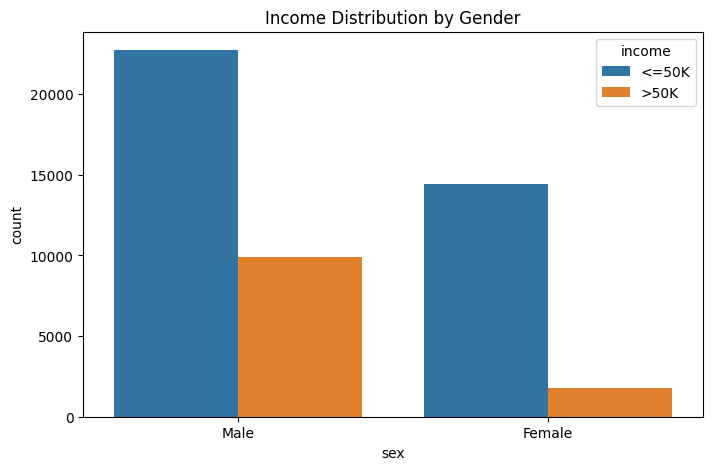

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=X['sex'], hue=y_cleaned)
plt.title("Income Distribution by Gender")
plt.show()

Histogram Distribution of Capital Gain

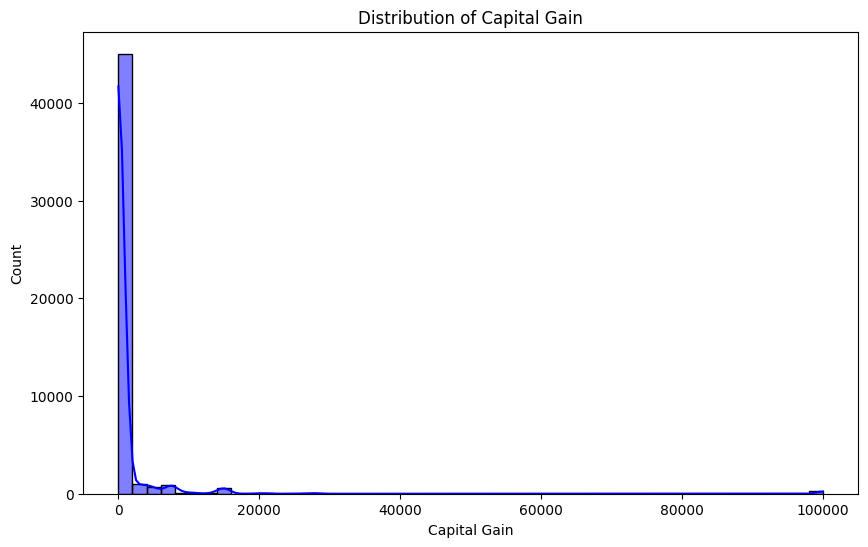

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(X['capital-gain'], bins=50, kde=True, color='blue')
plt.title("Distribution of Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.show()

Race versus Capital Gain Boxplot

<ipython-input-9-75a8761374c8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_capital_gain_by_race.values, y=avg_capital_gain_by_race.index, palette='viridis')


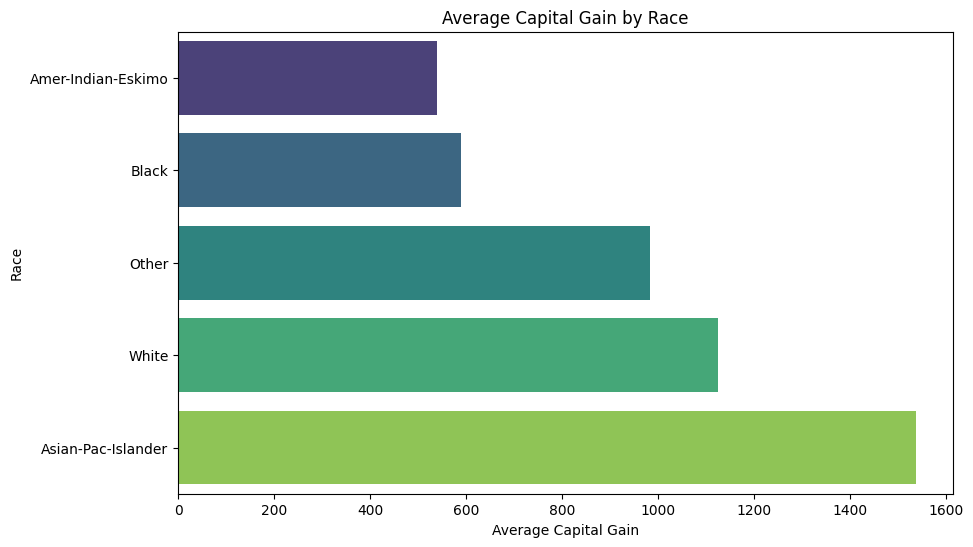

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_capital_gain_by_race = X.groupby('race')['capital-gain'].mean().sort_values()


plt.figure(figsize=(10, 6))
sns.barplot(x=avg_capital_gain_by_race.values, y=avg_capital_gain_by_race.index, palette='viridis')
plt.title('Average Capital Gain by Race')
plt.xlabel('Average Capital Gain')
plt.ylabel('Race')
plt.show()

Male vs Female Histogram Capital Gains

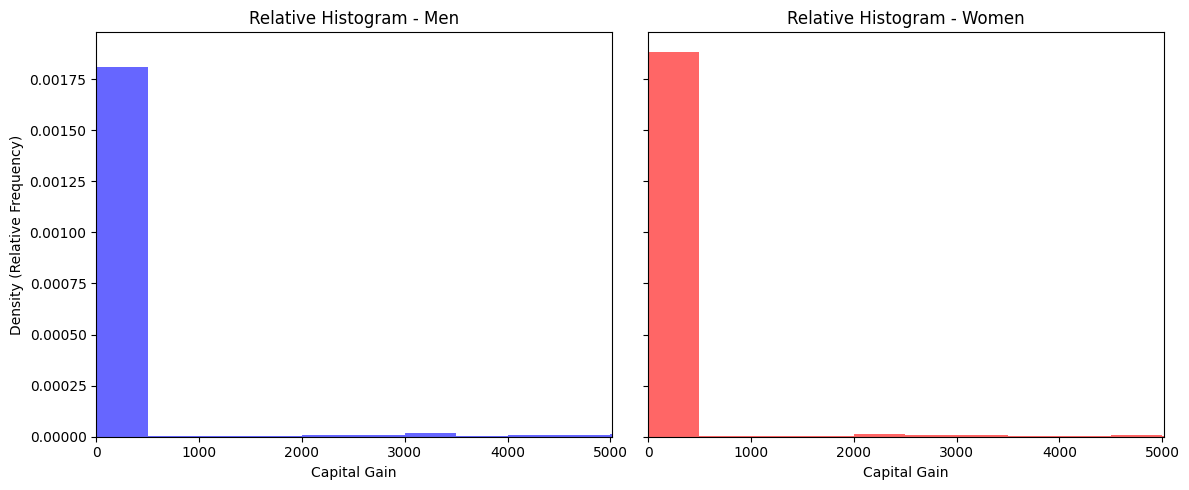

In [ ]:
import matplotlib.pyplot as plt

# Data for men and women
capital_gain_men = X[X['sex'] == 'Male']['capital-gain']
capital_gain_women = X[X['sex'] == 'Female']['capital-gain']

bins = 200
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Histogram for Men
axes[0].hist(capital_gain_men, bins=bins, color='blue', alpha=0.6, density=True)
axes[0].set_title("Relative Histogram - Men")
axes[0].set_xlabel("Capital Gain")
axes[0].set_ylabel("Density (Relative Frequency)")

# Histogram for Women
axes[1].hist(capital_gain_women, bins=bins, color='red', alpha=0.6, density=True)
axes[1].set_title("Relative Histogram - Women")
axes[1].set_xlabel("Capital Gain")

# Remove extreme outliers
plt.xlim(0, X['capital-gain'].quantile(0.95))

# Layout
plt.tight_layout()

plt.show()

Hours Worked per Gender

<ipython-input-11-7e09af99c86e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X['sex'], y=X['hours-per-week'], palette="Set2")


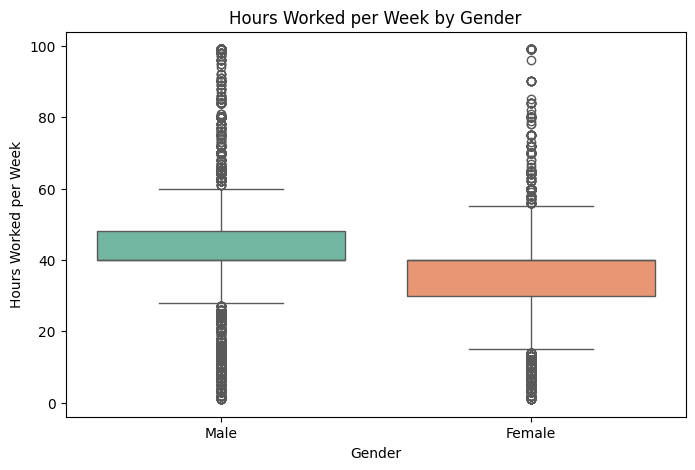

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=X['sex'], y=X['hours-per-week'], palette="Set2")
plt.title("Hours Worked per Week by Gender")
plt.xlabel("Gender")
plt.ylabel("Hours Worked per Week")
plt.show()

Age versus Hours Worked Scatter Plot

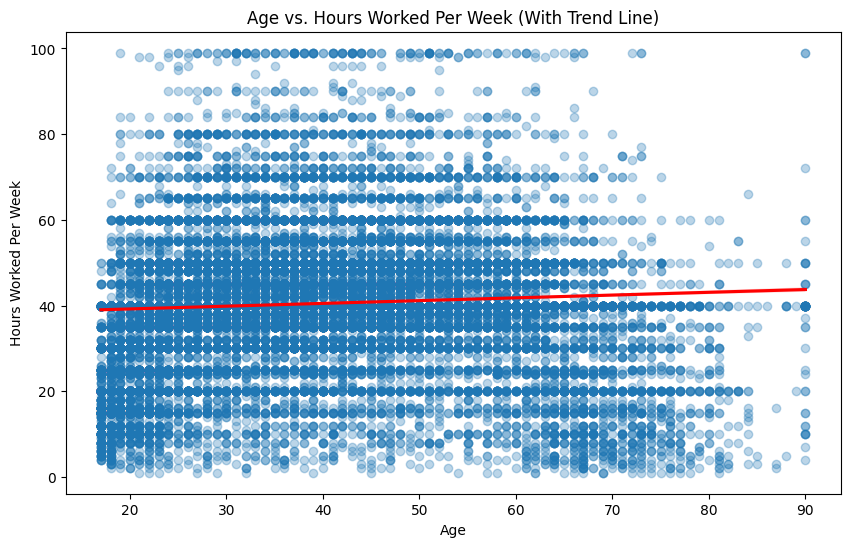

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='hours-per-week', data=X, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Age vs. Hours Worked Per Week (With Trend Line)")
plt.xlabel("Age")
plt.ylabel("Hours Worked Per Week")
plt.show()

Age vs Capital Gain regression

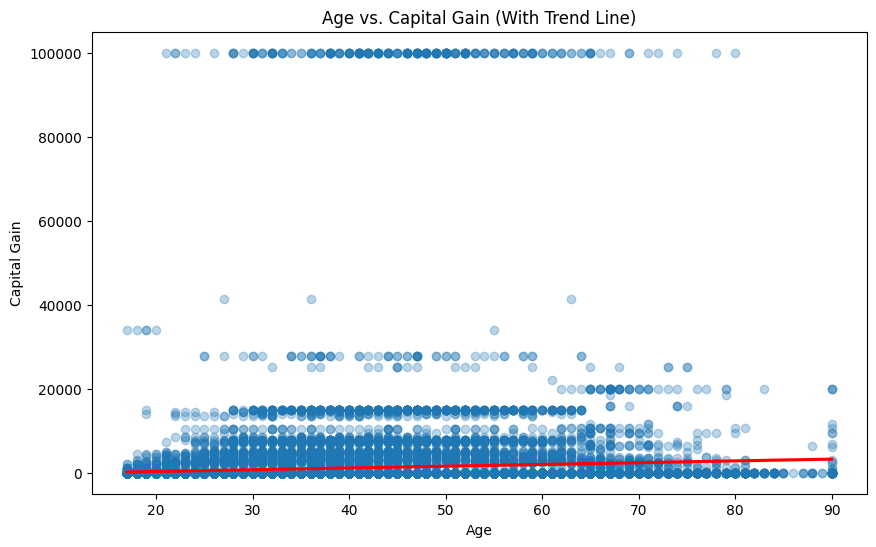

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='capital-gain', data=X, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Age vs. Capital Gain (With Trend Line)")
plt.xlabel("Age")
plt.ylabel("Capital Gain")
plt.show()

Age versus Income Boxplot

<ipython-input-18-61d76cd46540>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_cleaned, y=X['age'], palette="coolwarm")


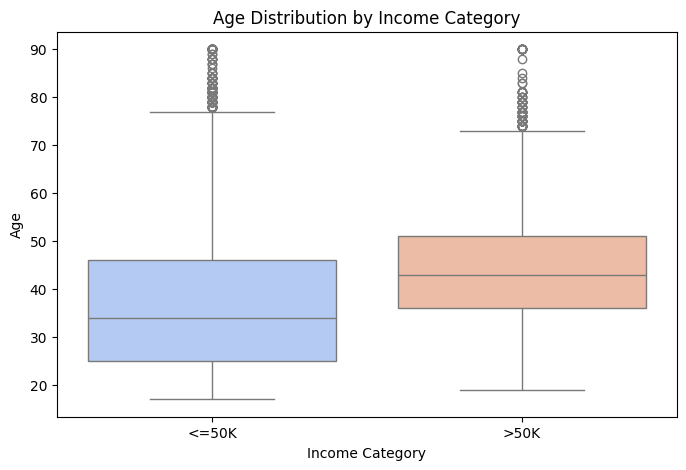

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=y_cleaned, y=X['age'], palette="coolwarm")
plt.title("Age Distribution by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Age")
plt.show()

##Hypothesis Formulation

Based on the exploratory data analysis I have formed the following hypotheses:
1. Men have higher incomes than women
2. Older people have higher capital gains than young people

Testing Hypothesis 1

Hypothesis Setup

Null Hypothesis: Men and women have the same proportion of high earners.

Alternative Hypothesis: Men have a higher proportion of high earners than women.

2 Propoportions Z Test

In [ ]:
# Merging gender and income data
df = pd.DataFrame({'gender': X['sex'], 'income': y_cleaned})

# Counting men and women
total_men = df[df['gender'] == 'Male'].shape[0]
total_women = df[df['gender'] == 'Female'].shape[0]

# Counting high income men and women
men_high_income = df[(df['gender'] == 'Male') & (df['income'] == '>50K')].shape[0]
women_high_income = df[(df['gender'] == 'Female') & (df['income'] == '>50K')].shape[0]

# Calculate proportions
p_men = men_high_income / total_men
p_women = women_high_income / total_women

print(f"Proportion of Men earning >50K: {p_men:.3f}")
print(f"Proportion of Women earning >50K: {p_women:.3f}")

Proportion of Men earning >50K: 0.304
Proportion of Women earning >50K: 0.109


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of high earners
counts = np.array([men_high_income, women_high_income])

# Total counts for each gender
totals = np.array([total_men, total_women])

# Perform two-proportion Z-test (one-tailed test)
z_stat, p_value = proportions_ztest(counts, totals, alternative='larger')

print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

Z-Statistic: 47.433
P-Value: 0.00000


The result of the 2 proportion Z test is a statistically significant p-value, thus, we can reject the null hypothesis that men and women have the same proportion of high earners, and subsequently, that men and women make the same incomes.

Testing Hypothesis 2

Hypothesis Setup

Null Hypothesis: The mean capital gains for older and younger individuals are the same.

Alternative Hypothesis: Older individuals have higher mean capital gains than younger individuals.

This is a one-tailed independent t-test because we are testing if older people have significantly higher capital gains.

In [ ]:
# Age cutoff 40 years old
age_cutoff = 40

# Creating two groups: Younger and Older
young_group = X[X['age'] < age_cutoff]['capital-gain']
old_group = X[X['age'] >= age_cutoff]['capital-gain']


print(f"Mean Capital Gain (Younger < {age_cutoff}): {young_group.mean():.2f}")
print(f"Mean Capital Gain (Older >= {age_cutoff}): {old_group.mean():.2f}")

Mean Capital Gain (Younger < 40): 580.11
Mean Capital Gain (Older >= 40): 1719.00


In [ ]:
from scipy.stats import ttest_ind

# Perform one-tailed independent t-test
t_stat, p_value = ttest_ind(old_group, young_group, alternative='greater')

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

T-Statistic: 16.806
P-Value: 0.00000


The result of the single tailed t test is a statistically significant p-value. Thus, we can reject the null hypothesis that the mean capital gains for younger and older people are equivelant.

##Summary of Conclusions

Hypothesis Test 1: Do Men Earn Higher Incomes Than Women?

Key Findings

- I compared the proportion of men and women earning >50K using a two-proportion Z-test.

- The test measured whether the proportion of high earners among men was significantly greater than among women.

- The results indicated that a higher proportion of men earned >50K compared to women.

Visualization Insights

- A bar plot of proportions showed that men had a higher proportion of high-income earners

Hypothesis Test 2: Do Older People Have Higher Capital Gains Than Younger People?

Key Findings

- I conducted an independent t-test comparing mean capital gains between older (≥40 years) and younger (<40 years) individuals.

- The results suggested that older individuals had higher average capital gains.

- However, capital gains were highly skewed, with most people having zero capital gains and only a small fraction accumulating significant wealth.

Visualization Insights
- A box plot revealed that capital gains were concentrated among a few individuals, particularly in the older group.